In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [18]:
folder_path = "../../data/output/WattsStrogatzGraphs/ComplexContagion/"
files=os.listdir(folder_path)

p="p5"
data={}
data2={}
average={}

for file in files:
    if os.path.isfile(folder_path+"/"+file):
        with open(os.path.join(folder_path, file), 'r') as f:
            content = pd.read_csv(folder_path+"/"+file, names=['Epoch', 'Pop', 'Frac', 'DiscEdge'], skiprows=1, sep=" ")
            file=file.split('_')
            r=file[4]
            p2=file[2]
            if p2 != p:
                continue
            if r in['r100']:
                continue
            #print(file)
            content=content.drop(['DiscEdge', 'Pop'], axis=1)    
            finalPerc=content.iloc[-1, 1]
            finalEpoch=content.iloc[-1, 0]
            if finalPerc>0.5:
                content['Frac']=1-content['Frac']

            if r in data:
                data[r].append(content)
                data2[r].append(finalEpoch)
            else:
                data[r]=[]
                data[r].append(content)
                data2[r]=[]
                data2[r].append(finalEpoch)

for k, v in data2.items():
    avg=sum(v)/len(v)
    average[k]=avg

print(average)
#print(data)
p=p[1:]
        

{'r40': 572.75, 'r20': 485.625, 'r80': 1064.9166666666667, 'r10': 454.7916666666667, 'r70': 850.5416666666666, 'r90': 1517.6521739130435, 'r0': 429.7083333333333, 'r50': 635.25, 'r30': 523.2916666666666, 'r60': 721.9166666666666}


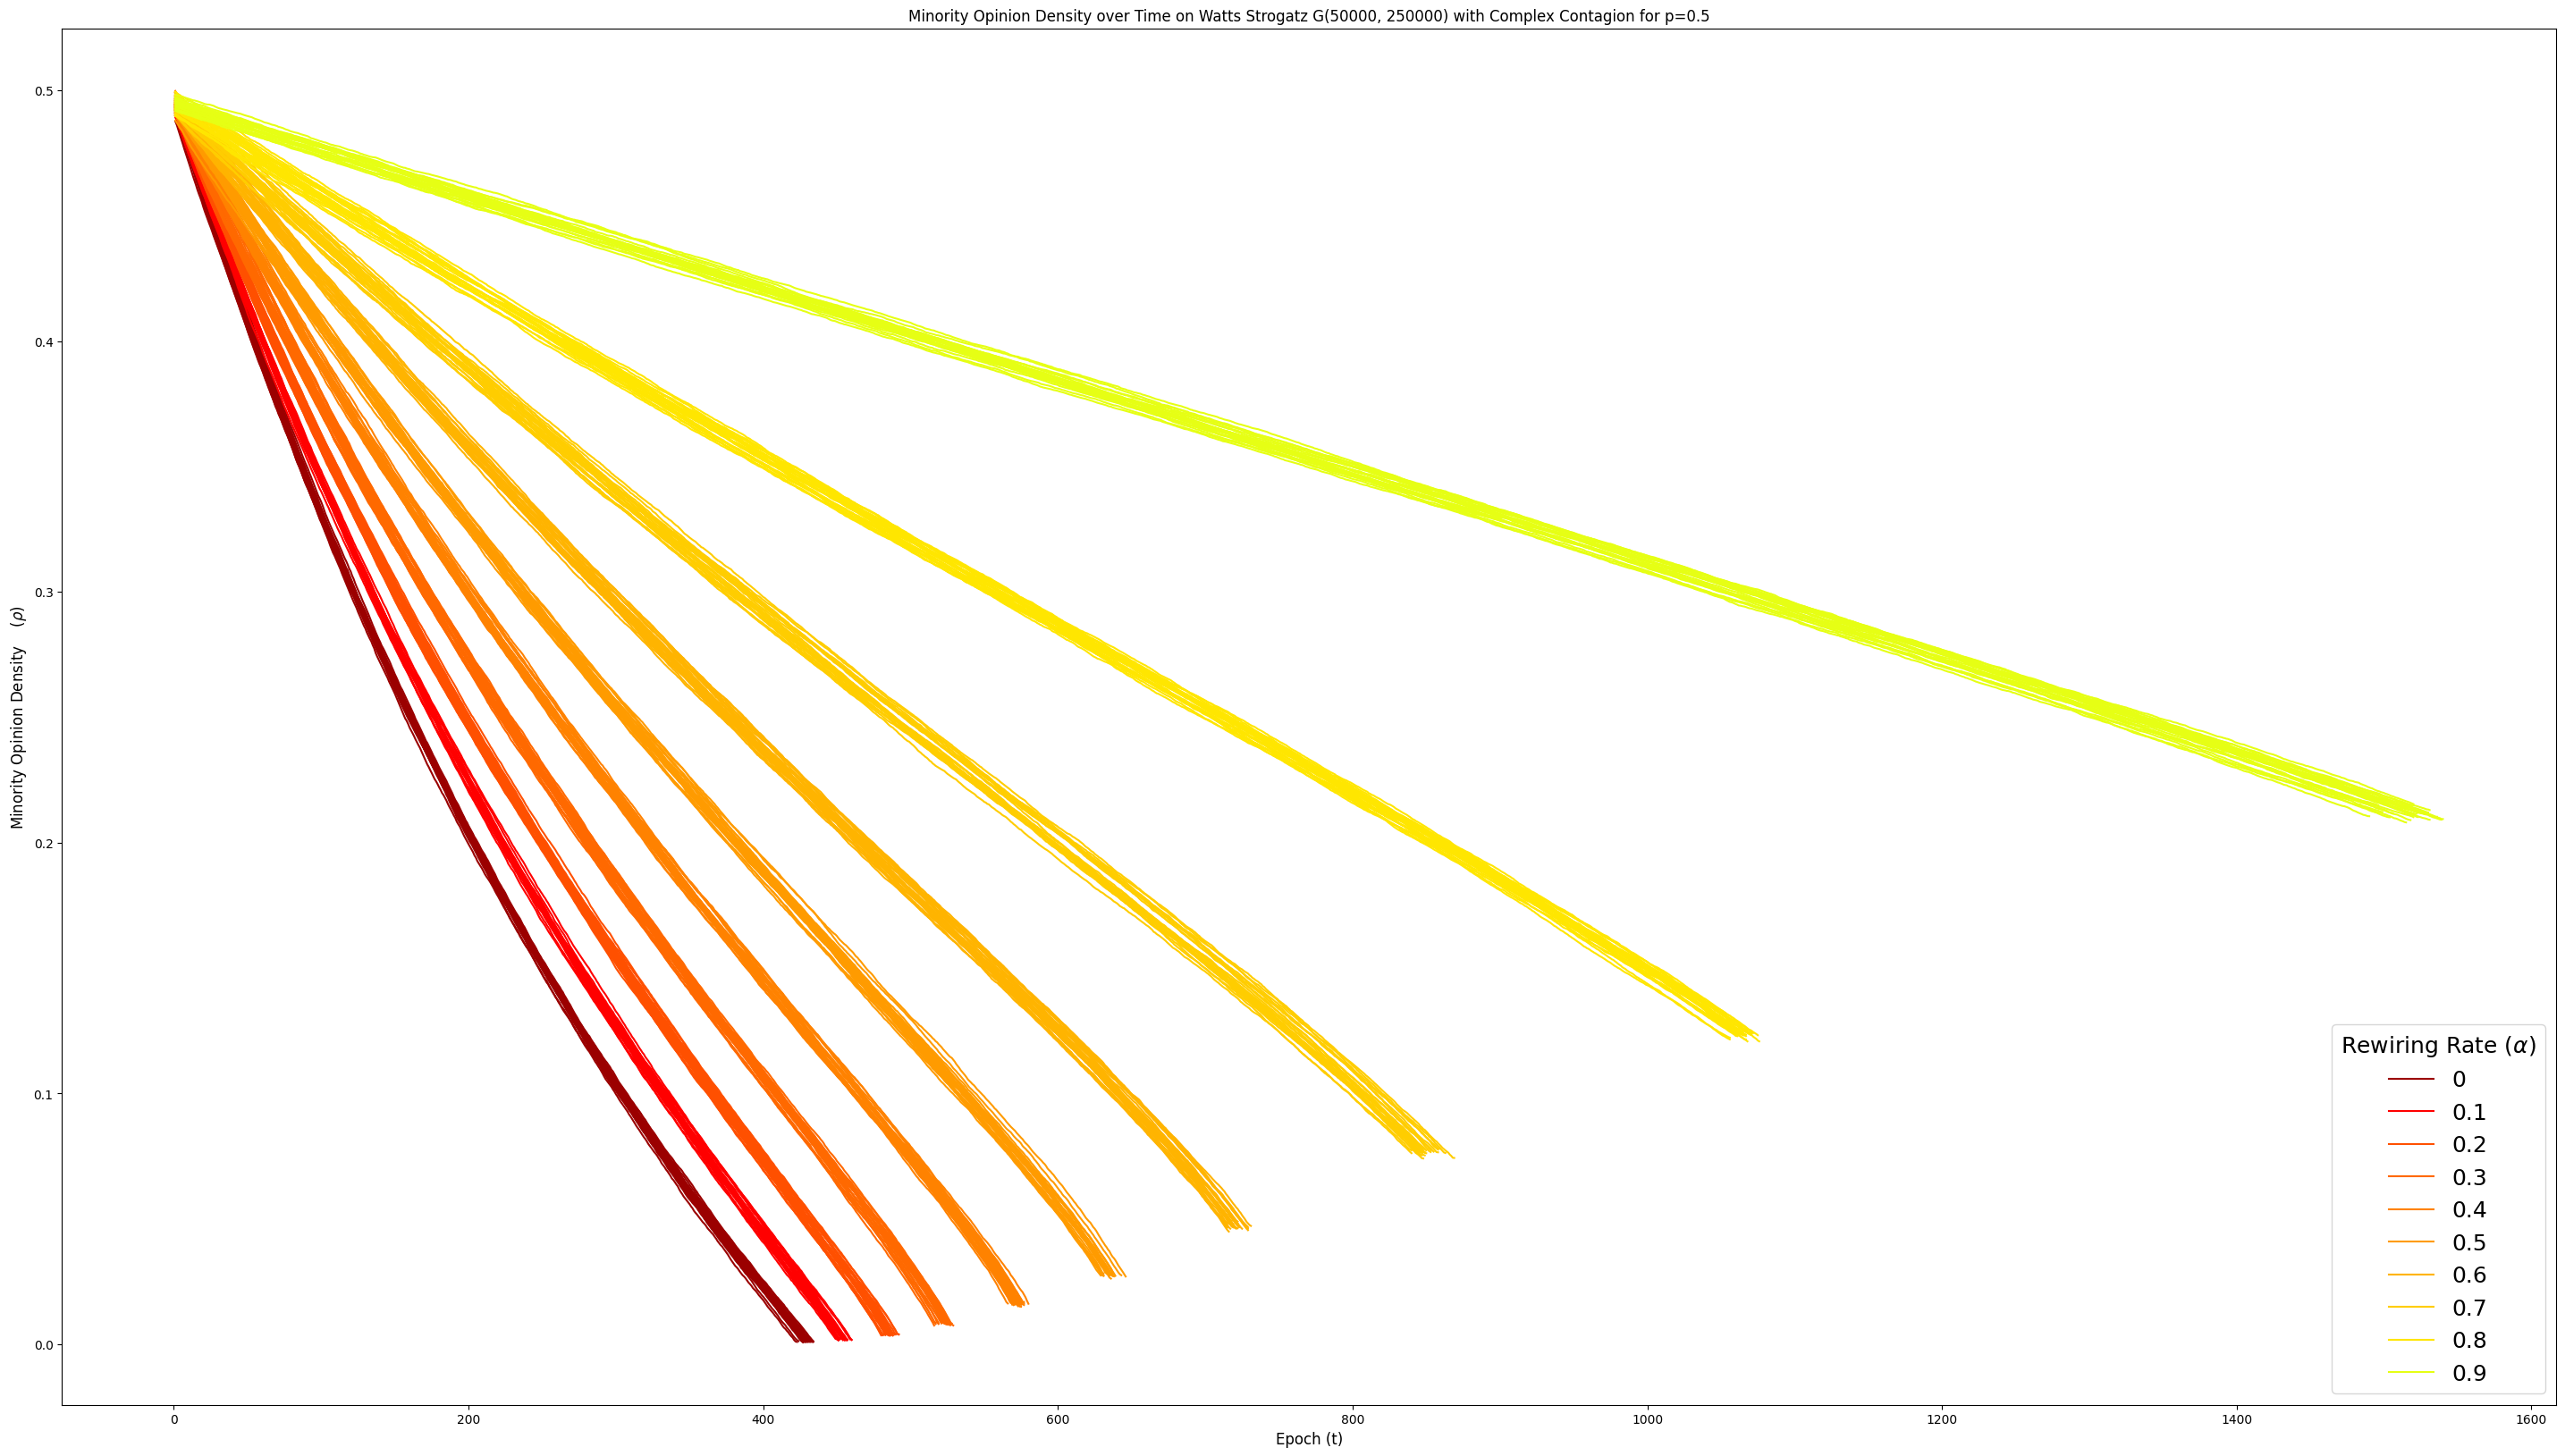

In [19]:
fig=plt.figure(figsize=(36,20))
ax=fig.add_subplot(111)
colr=11

rs=['r0', 'r10', 'r20', 'r30', 'r40', 'r50', 'r60', 'r70', 'r80', 'r90']
numberOfOutputs={"r0":0, "r10": 0, "r20": 0, "r30":0, "r40":0, "r50":0, "r60":0, "r70":0, "r80":0, "r90":0}

for k in rs:
    v=data[k]
    if k=='r0':
        colr=(155 / 255, 0 / 255, 0 / 255)
        label='0'
    elif k=='r10':
        colr=(255 / 255, 0 / 255, 0 / 255)
        label='0.1'
    elif k=='r20':
        colr=(255 / 255, 80 / 255, 0 / 255)
        label='0.2'
    elif k=='r30':
        colr=(255 / 255, 105 / 255, 0 / 255)
        label='0.3'
    elif k=='r40':
        colr=(255 / 255, 130 / 255, 0 / 255)
        label='0.4'
    elif k=='r50':
        colr=(255 / 255, 155 / 255, 0 / 255)
        label='0.5'
    elif k=='r60':
        colr=(255 / 255, 180 / 255, 0/ 255)
        label='0.6'
    elif k=='r70':
        colr=(255 / 255, 205 / 255, 0 / 255)
        label='0.7'
    elif k=='r80':
        colr=(255 / 255, 230 / 255, 0 / 255)
        label='0.8'
    elif k=='r90':
        colr=(230 / 255, 255 / 255, 20/ 255)
        label='0.9'

    for serie in v:
        #print(serie)
        if numberOfOutputs[k]==0:
            ax.plot(serie['Epoch'].tolist(), serie['Frac'].tolist(), color=colr, label=label)
        else:
            ax.plot(serie['Epoch'].tolist(), serie['Frac'].tolist(), color=colr)
        numberOfOutputs[k]=numberOfOutputs.get(k)+1

plt.title('Minority Opinion Density over Time on Watts Strogatz G(50000, 250000) with Complex Contagion for p='+str(int(p)/10), fontsize='large')
plt.xlabel("Epoch (t)", fontsize='large')
plt.ylabel("Minority Opinion Density    ($\\rho$)", fontsize='large')
plt.legend(loc='lower right', title="Rewiring Rate ($\\alpha$)", fontsize='18', title_fontsize='18')
plt.show()


In [20]:
fig.savefig('../../figures/WattsStrogatz/ComplexContagion/MinorityOpinionOverTime_p5.png', dpi=300)

0.4
0.2
0.8
0.1
0.7
0.9
0.0
0.5
0.3
0.6


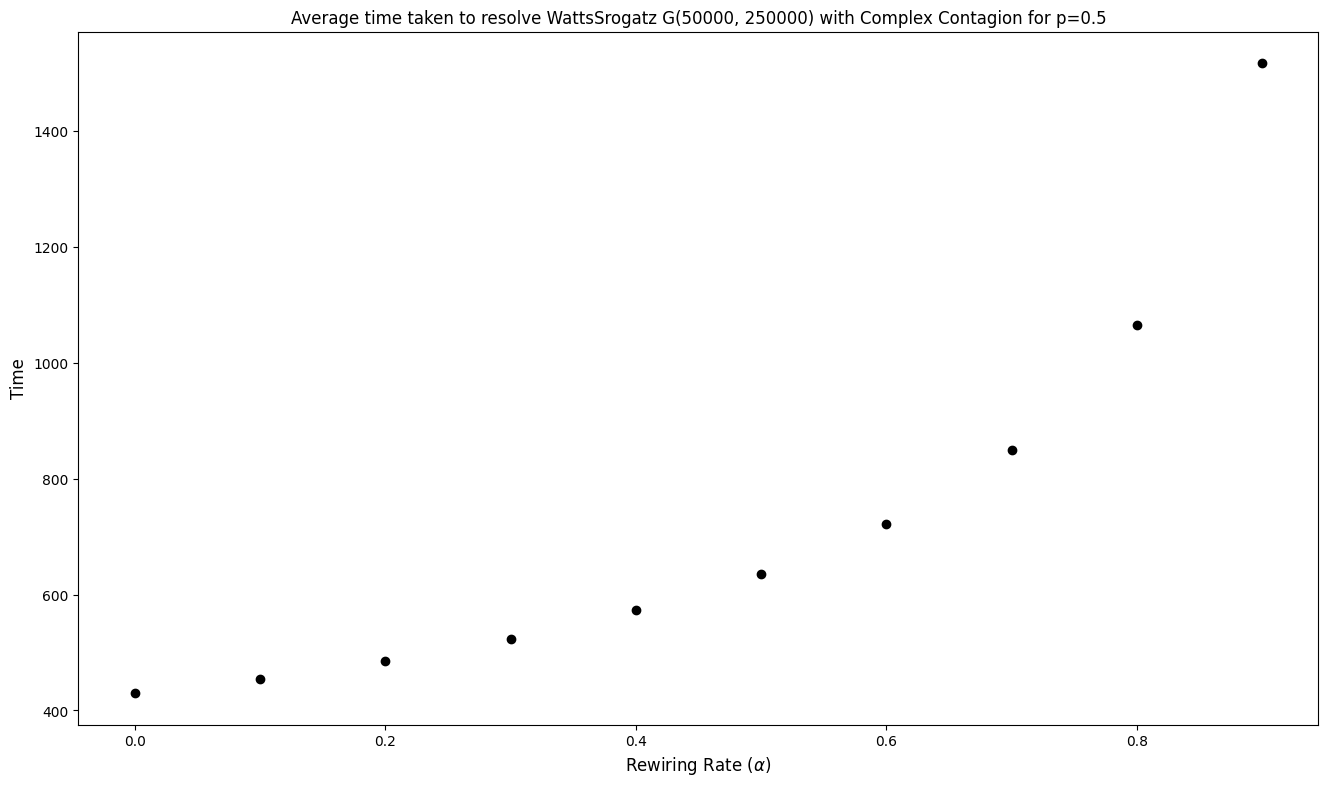

In [21]:
fig=plt.figure(figsize=(16, 9))
ax = fig.subplots()
for k, v in average.items():
    k=int(k[1:])/100
    print(k)
    ax.scatter(k, v, color='black')
plt.title('Average time taken to resolve WattsSrogatz G(50000, 250000) with Complex Contagion for p='+str(int(p)/10), fontsize='large')
plt.xlabel("Rewiring Rate ($\\alpha$)", fontsize='large')
plt.ylabel("Time", fontsize='large')
plt.show()

In [17]:
fig.savefig('../../figures/WattsStrogatz/ComplexContagion/AverageResolveTime_p5.png', dpi=300)